In [1]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
matplotlib.rcParams.update({'font.size': 14})

In [4]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

### Пути к фалам

In [5]:
TRAIN_DATASET_PATH = r'\Users\VasiliyBarovLAPTOP\Desktop\NW\train.csv'
TEST_DATASET_PATH = r'\Users\VasiliyBarovLAPTOP\Desktop\NW\test.csv'

#### Загрузка данных

In [6]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
5,5804,99,3.0,62.528465,47.103833,6.0,9,9.0,1972,0.012339,B,B,35,5776,1,2078.0,2,4,B,161044.944138
6,8864,44,1.0,33.938750,21.772930,9.0,1,12.0,1968,0.232205,B,B,24,4860,1,80.0,0,3,B,142402.739272
7,13072,59,2.0,50.391814,32.893256,8.0,8,17.0,1986,0.019509,B,B,37,7687,11,176.0,5,5,B,326174.175191
8,9951,1,1.0,46.887892,44.628132,1.0,12,20.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,160400.401732
9,8094,6,3.0,79.867477,75.085125,1.0,3,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,194756.023945


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [8]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B
5,868,38,3.0,87.139994,53.180419,10.0,4,23.0,2011,0.060753,B,B,15,2787,2,520.0,0,7,B
6,672,62,1.0,46.269456,22.820239,11.0,8,17.0,2014,0.072158,B,B,2,629,1,NaN,0,0,A
7,2471,2,2.0,48.172969,29.924204,6.0,4,9.0,1974,0.000000,B,B,33,7425,1,NaN,2,5,B
8,4510,1,1.0,43.153761,21.017596,9.0,10,17.0,2014,0.007122,B,B,1,264,0,NaN,0,1,B
9,8354,62,2.0,62.593787,59.786844,10.0,1,16.0,1981,0.002212,B,B,39,7614,3,NaN,1,5,A


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

Приведение типов

In [10]:
train_df['Id'] = train_df['Id'].astype(str)
train_df['DistrictId'] = train_df['DistrictId'].astype(str)

## 1. EDA

Целевая переменная

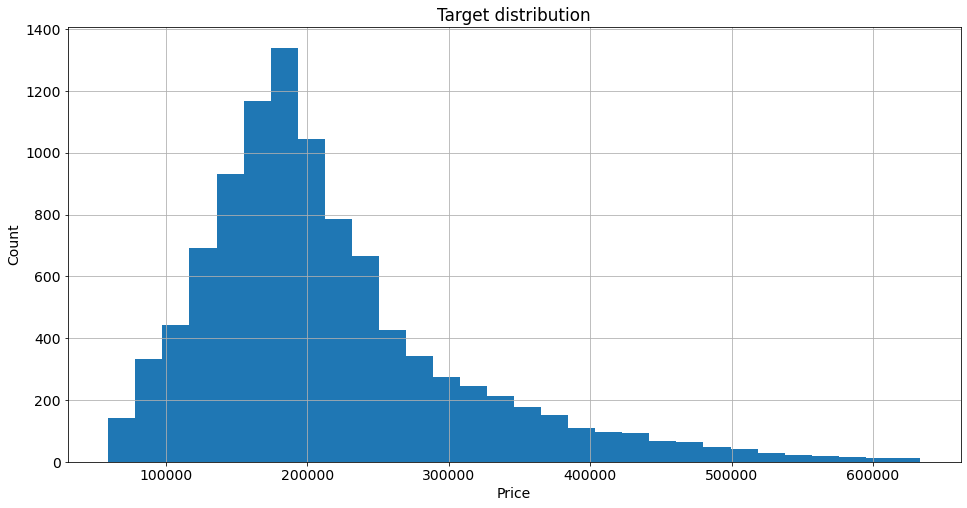

In [11]:
plt.figure(figsize = (16, 8))

train_df['Price'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribution')
plt.show()

Количественные переменные

In [12]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


### 1.1. Обработка выбросов

#### Rooms

In [13]:
train_df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [14]:
train_df['Rooms_outlier'] = 0
train_df.loc[(train_df['Rooms'] == 0) | (train_df['Rooms'] >= 6), 'Rooms_outlier'] = 1
train_df.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,...,B,11,3097,0,NaN,0,0,B,305018.871089,0
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,B,30,6207,1,1183.0,1,0,B,177734.553407,0
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,B,33,5261,0,240.0,3,1,B,282078.720850,0
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,...,B,1,264,0,NaN,0,1,B,168106.007630,0
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,B,33,8667,2,NaN,0,6,B,343995.102962,0
5,5804,99,3.0,62.528465,47.103833,6.0,9,9.0,1972,0.012339,...,B,35,5776,1,2078.0,2,4,B,161044.944138,0
6,8864,44,1.0,33.938750,21.772930,9.0,1,12.0,1968,0.232205,...,B,24,4860,1,80.0,0,3,B,142402.739272,0
7,13072,59,2.0,50.391814,32.893256,8.0,8,17.0,1986,0.019509,...,B,37,7687,11,176.0,5,5,B,326174.175191,0
8,9951,1,1.0,46.887892,44.628132,1.0,12,20.0,1977,0.007122,...,B,1,264,0,NaN,0,1,B,160400.401732,0
9,8094,6,3.0,79.867477,75.085125,1.0,3,17.0,2014,0.243205,...,B,5,1564,0,540.0,0,0,B,194756.023945,0


Объекты, где количество комнат больше 6 заменяем на медиану

In [15]:
train_df.loc[train_df['Rooms'] == 0, 'Rooms'] = 1
train_df.loc[train_df['Rooms'] >= 6, 'Rooms'] = train_df['Rooms'].median()
train_df['Rooms'].value_counts()

2.0    3884
1.0    3713
3.0    2235
4.0     150
5.0      18
Name: Rooms, dtype: int64

#### Square

Согласно СНиП 31-01-2003 "Строительные нормы и правила РФ", минимальная площадь общей жилой комнаты в однокомнатной квартире – 14 м2, кухни - 5 м2. Таким образом минимальная площадь квартиры должна составлять 21 м2.

Проверяем что в нашем train_df

In [16]:
train_df[(train_df['Square']) < 21]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier
161,6782,45,1.0,2.954309,5.257278,1.0,3,1.0,1977,0.195781,...,B,23,5212,6,NaN,3,2,B,438005.182323,0
299,828,90,1.0,20.924926,10.651455,3.0,7,5.0,1968,0.265089,...,B,37,5288,0,1937.0,3,2,B,128808.087357,0
328,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,...,B,9,1892,0,NaN,0,1,B,161379.067034,0
890,3732,112,1.0,20.213128,13.800281,3.0,5,9.0,1974,0.069660,...,B,31,6119,4,NaN,1,2,B,113050.229914,0
1401,9487,5,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,...,B,16,3433,4,2643.0,4,5,B,369472.403061,0
3686,15877,57,3.0,16.547242,16.698571,8.0,5,5.0,1962,0.133215,...,B,49,11395,3,1406.0,3,4,A,77835.185808,0
4496,15744,34,1.0,1.988943,2.642219,1.0,21,4.0,1977,0.069753,...,B,53,13670,4,NaN,1,11,B,458378.777006,0
4800,7657,38,1.0,4.502784,4.618547,1.0,28,1.0,1977,0.060753,...,B,15,2787,2,520.0,0,7,B,483283.488083,0
5009,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,...,B,4,915,0,NaN,0,0,B,107604.269441,0
5870,6927,21,1.0,16.117154,8.822988,0.0,2,5.0,1965,0.194489,...,B,47,8004,3,125.0,3,5,B,79913.267856,0


Принимаем полученные 24 объекта за выбросы и замняем для них значение площади медианой

In [17]:
train_df['Square_outlier'] = 0
train_df.loc[(train_df['Square'] < 21), 'Square_outlier'] = 1

In [18]:
Square_sq = (train_df['Square'] < 21)
train_df.loc[Square_sq, 'Square'] = train_df['Square'].median()
train_df[(train_df['Square']) < 21]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier,Square_outlier


#### KitchenSquare

Согласно СНиП 31-01-2003 "Строительные нормы и правила РФ", минимальная площадь кухни - 5 м2.

In [19]:
train_df['KitchenSquare'].value_counts()

1.0       2460
8.0       1306
5.0       1169
10.0      1075
6.0       1038
9.0        843
0.0        697
7.0        609
12.0       249
11.0       233
13.0        67
14.0        51
4.0         39
15.0        31
3.0         22
16.0        16
20.0        14
17.0        12
19.0        11
18.0         6
2.0          4
22.0         3
30.0         2
43.0         2
41.0         2
112.0        2
25.0         2
51.0         2
37.0         2
58.0         2
32.0         2
21.0         1
73.0         1
75.0         1
36.0         1
27.0         1
63.0         1
1970.0       1
54.0         1
53.0         1
60.0         1
26.0         1
66.0         1
39.0         1
29.0         1
78.0         1
31.0         1
84.0         1
48.0         1
96.0         1
42.0         1
40.0         1
23.0         1
72.0         1
35.0         1
62.0         1
123.0        1
2014.0       1
Name: KitchenSquare, dtype: int64

In [20]:
train_df['KitchenSquare'].quantile(.975), train_df['KitchenSquare'].quantile(.025)

(13.0, 0.0)

In [21]:
condition = (train_df['KitchenSquare'].isna()) \
             | (train_df['KitchenSquare'] > train_df['KitchenSquare'].quantile(.975))
        
train_df.loc[condition, 'KitchenSquare'] = train_df['KitchenSquare'].median()

train_df.loc[train_df['KitchenSquare'] < 5, 'KitchenSquare'] = 5

In [22]:
train_df['KitchenSquare'].value_counts()

5.0     4391
8.0     1306
6.0     1227
10.0    1075
9.0      843
7.0      609
12.0     249
11.0     233
13.0      67
Name: KitchenSquare, dtype: int64

#### LifeSquare

Определяем выбросы, где жилая площадь больше общей площади квартиры

In [23]:
((train_df['LifeSquare']) > (train_df['Square'])).sum()

471

Заменяем выбросы значениями, равными Square - KitchenSquare - 3 (не жилая часть квартиры)

In [24]:
train_df['LifeSquare_outlier'] = 0
train_df.loc[((train_df['LifeSquare']) > (train_df['Square'])), 'Square_outlier'] = 1

In [25]:
condition_lsq = (train_df['LifeSquare'] > train_df['Square'])
train_df.loc[condition_lsq, 'LifeSquare'] = train_df.loc[condition_lsq, 'Square'] \
                                            - train_df.loc[condition_lsq, 'KitchenSquare'] - 3

In [26]:
((train_df['LifeSquare']) > (train_df['Square'])).sum()

0

#### Floor & HouseFloor

Проверяем сколько этажей в домах

In [27]:
train_df['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        36.,  37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,  99., 117.])

In [28]:
train_df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42],
      dtype=int64)

Проверяем случаи, где указанный этаж превышает макимальное количество этажей в доме

In [29]:
(train_df['Floor'] > train_df['HouseFloor']).sum()

1825

Случаи, где 'HouseFloor' = 0, 'HouseFloor'> 50 и 'Floor' > 'HouseFloor' пинимаем за выбросы и обрабатываем

In [30]:
train_df['HouseFloor_outlier'] = 0
train_df.loc[(train_df['HouseFloor'] == 0) | (train_df['HouseFloor'] > 50), 'HouseFloor_outlier'] = 1
train_df.loc[train_df['Floor'] > train_df['HouseFloor'], 'HouseFloor_outlier'] = 1

In [31]:
train_df.loc[(train_df['HouseFloor'] == 0) | (train_df['HouseFloor'] > 50), 'HouseFloor'] = train_df['HouseFloor'].median()

In [32]:
floor_outliers = train_df.loc[train_df['Floor'] > train_df['HouseFloor']].index

In [33]:
train_df.loc[floor_outliers, 'Floor'] = train_df.loc[floor_outliers, 'HouseFloor']\
                                                .apply(lambda x: random.randint(1, x))

In [34]:
(train_df['Floor'] > train_df['HouseFloor']).sum()

0

In [35]:
train_df['HouseFloor'].sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 36., 37., 38., 39., 40., 44., 45.,
       47., 48.])

#### HouseYear

In [36]:
train_df['HouseYear'].sort_values(ascending=False)

9163    20052011
8828        4968
7721        2020
9122        2020
7955        2020
          ...   
7610        1916
6250        1914
2066        1912
2795        1912
6794        1910
Name: HouseYear, Length: 10000, dtype: int64

In [37]:
train_df.loc[train_df['HouseYear'] > 2020, 'HouseYear'] = 2020

### 1.2. Заполняем пропуски

In [38]:
train_df.isna().sum()

Id                       0
DistrictId               0
Rooms                    0
Square                   0
LifeSquare            2113
KitchenSquare            0
Floor                    0
HouseFloor               0
HouseYear                0
Ecology_1                0
Ecology_2                0
Ecology_3                0
Social_1                 0
Social_2                 0
Social_3                 0
Healthcare_1          4798
Helthcare_2              0
Shops_1                  0
Shops_2                  0
Price                    0
Rooms_outlier            0
Square_outlier           0
LifeSquare_outlier       0
HouseFloor_outlier       0
dtype: int64

#### LifeSquare

In [39]:
train_df[['Square', 'LifeSquare', 'KitchenSquare']].head(10)

,Square,LifeSquare,KitchenSquare
0,115.027311,NaN,10.0
1,39.832524,23.169223,8.0
2,78.342215,47.671972,10.0
3,40.409907,NaN,5.0
4,64.285067,38.562517,9.0
5,62.528465,47.103833,6.0
6,33.938750,21.772930,9.0
7,50.391814,32.893256,8.0
8,46.887892,44.628132,5.0
9,79.867477,75.085125,5.0


Для LifeSquare = NaN заполняем пропуски значениями, равными Square - KitchenSquare - 3 (не жилая часть квартиры)

In [40]:
train_df['LifeSquare_nan'] = train_df['LifeSquare'].isna() * 1

condition = (train_df['LifeSquare'].isna()) \
             & (~train_df['Square'].isna()) \
             & (~train_df['KitchenSquare'].isna())
        
train_df.loc[condition, 'LifeSquare'] = train_df.loc[condition, 'Square'] \
                                            - train_df.loc[condition, 'KitchenSquare'] - 3

In [41]:
train_df.isna().sum()

Id                       0
DistrictId               0
Rooms                    0
Square                   0
LifeSquare               0
KitchenSquare            0
Floor                    0
HouseFloor               0
HouseYear                0
Ecology_1                0
Ecology_2                0
Ecology_3                0
Social_1                 0
Social_2                 0
Social_3                 0
Healthcare_1          4798
Helthcare_2              0
Shops_1                  0
Shops_2                  0
Price                    0
Rooms_outlier            0
Square_outlier           0
LifeSquare_outlier       0
HouseFloor_outlier       0
LifeSquare_nan           0
dtype: int64

#### Healthcare_1

Заполняем значения NaN медианой

In [42]:
train_df['Healthcare_1_nan'] = 0
train_df.loc[train_df['Healthcare_1'].isna(), 'Healthcare_1_nan'] = 1

In [43]:
median = train_df['Healthcare_1'].median()
train_df['Healthcare_1'].fillna(median, inplace=True)

In [44]:
train_df[(train_df['Healthcare_1_nan']) == 1]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier,Square_outlier,LifeSquare_outlier,HouseFloor_outlier,LifeSquare_nan,Healthcare_1_nan
0,11809,27,3.0,115.027311,102.027311,10.0,4,10.0,2014,0.075424,...,0,0,B,305018.871089,0,0,0,0,1,1
3,2352,1,1.0,40.409907,32.409907,5.0,10,22.0,1977,0.007122,...,0,1,B,168106.007630,0,0,0,0,1,1
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,0,6,B,343995.102962,0,0,0,0,0,1
8,9951,1,1.0,46.887892,44.628132,5.0,12,20.0,1977,0.007122,...,0,1,B,160400.401732,0,0,0,0,0,1
11,16755,88,2.0,53.975144,34.153584,8.0,2,12.0,1978,0.127376,...,3,9,B,253124.005332,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9289,1,3.0,84.486078,76.486078,5.0,4,22.0,2016,0.007122,...,0,1,B,264213.558631,0,1,0,0,0,1
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,...,1,9,B,119367.455796,0,0,0,0,0,1
9996,16265,27,2.0,64.307684,37.038420,9.0,13,13.0,1977,0.072158,...,0,0,A,199715.148807,0,0,0,1,0,1
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,...,1,5,B,165953.912580,0,0,0,0,0,1


In [45]:
train_df.isna().sum()

Id                    0
DistrictId            0
Rooms                 0
Square                0
LifeSquare            0
KitchenSquare         0
Floor                 0
HouseFloor            0
HouseYear             0
Ecology_1             0
Ecology_2             0
Ecology_3             0
Social_1              0
Social_2              0
Social_3              0
Healthcare_1          0
Helthcare_2           0
Shops_1               0
Shops_2               0
Price                 0
Rooms_outlier         0
Square_outlier        0
LifeSquare_outlier    0
HouseFloor_outlier    0
LifeSquare_nan        0
Healthcare_1_nan      0
dtype: int64

## 2. Создание классов

In [46]:
class DataPreprocessing:
    """Подготовка исходных данных"""

    def __init__(self):
        """Параметры класса"""
        self.medians = None
        self.kitchen_square_quantile = None
        
    def fit(self, X):
        """Сохранение статистик"""       
        # Расчет медиан
        self.medians = X.median()
        self.kitchen_square_quantile = X['KitchenSquare'].quantile(.975)
    
    def transform(self, X):
        """Трансформация данных"""

        # Rooms
        X['Rooms_outlier'] = 0
        X.loc[(X['Rooms'] == 0) | (X['Rooms'] >= 6), 'Rooms_outlier'] = 1
        
        X.loc[X['Rooms'] == 0, 'Rooms'] = 1
        X.loc[X['Rooms'] >= 6, 'Rooms'] = self.medians['Rooms']
        
        # Square
        X['Square_outlier'] = 0
        X.loc[(X['Square'] < 21), 'Square_outlier'] = 1
        
        Square_sq = (X['Square'] < 21)
        X.loc[Square_sq, 'Square'] = self.medians['Square']
        
        # KitchenSquare
        condition = (X['KitchenSquare'].isna()) \
                    | (X['KitchenSquare'] > self.kitchen_square_quantile)
        
        X.loc[condition, 'KitchenSquare'] = self.medians['KitchenSquare']

        X.loc[X['KitchenSquare'] < 5, 'KitchenSquare'] = 5
        
        # LifeSquare
        X['LifeSquare_outlier'] = 0
        X.loc[((X['LifeSquare']) > (X['Square'])), 'Square_outlier'] = 1
        
        condition_lsq = (X['LifeSquare'] > X['Square'])
        X.loc[condition_lsq, 'LifeSquare'] = X.loc[condition_lsq, 'Square'] \
                                            - X.loc[condition_lsq, 'KitchenSquare'] - 3
        
        # HouseFloor, Floor
        X['HouseFloor_outlier'] = 0
        X.loc[(X['HouseFloor'] == 0) | (X['HouseFloor'] > 50), 'HouseFloor_outlier'] = 1
        X.loc[X['Floor'] > X['HouseFloor'], 'HouseFloor_outlier'] = 1

        X.loc[(X['HouseFloor'] == 0) | (X['HouseFloor'] > 50), 'HouseFloor'] = self.medians['HouseFloor']

        floor_outliers = X.loc[X['Floor'] > X['HouseFloor']].index

        X.loc[floor_outliers, 'Floor'] = X.loc[floor_outliers, 'HouseFloor']\
                                                .apply(lambda x: random.randint(1, x))
        
        # HouseYear
        current_year = datetime.now().year
        
        X['HouseYear_outlier'] = 0
        X.loc[X['HouseYear'] > current_year, 'HouseYear_outlier'] = 1
        
        X.loc[X['HouseYear'] > current_year, 'HouseYear'] = current_year
        
        # Healthcare_1
        X['Healthcare_1_nan'] = 0
        X.loc[X['Healthcare_1'].isna(), 'Healthcare_1_nan'] = 1
        
        X['Healthcare_1'].fillna(self.medians, inplace=True)
            
        # LifeSquare
        X['LifeSquare_nan'] = X['LifeSquare'].isna() * 1
        condition = (X['LifeSquare'].isna()) & \
                      (~X['Square'].isna()) & \
                      (~X['KitchenSquare'].isna())
        
        X.loc[condition, 'LifeSquare'] = X.loc[condition, 'Square'] - X.loc[condition, 'KitchenSquare'] - 3
        
        
        X.fillna(self.medians, inplace=True)
        
        return X

## 3. Построение новых признаков

#### Dummies

In [47]:
binary_to_numbers = {'A': 0, 'B': 1}

train_df['Ecology_2'] = train_df['Ecology_2'].replace(binary_to_numbers)
train_df['Ecology_3'] = train_df['Ecology_3'].replace(binary_to_numbers)
train_df['Shops_2'] = train_df['Shops_2'].replace(binary_to_numbers)

#### DistrictSize, IsDistrictLarge

In [48]:
district_size = train_df['DistrictId'].value_counts().reset_index()\
                    .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

district_size.head()

,DistrictId,DistrictSize
0,27,851
1,1,652
2,23,565
3,6,511
4,9,294


In [49]:
train_df = train_df.merge(district_size, on='DistrictId', how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Shops_1,Shops_2,Price,Rooms_outlier,Square_outlier,LifeSquare_outlier,HouseFloor_outlier,LifeSquare_nan,Healthcare_1_nan,DistrictSize
0,11809,27,3.0,115.027311,102.027311,10.0,4,10.0,2014,0.075424,...,0,1,305018.871089,0,0,0,0,1,1,851
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,0,1,177734.553407,0,0,0,0,0,0,78
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,1,1,282078.720850,0,0,0,0,0,0,652
3,2352,1,1.0,40.409907,32.409907,5.0,10,22.0,1977,0.007122,...,1,1,168106.007630,0,0,0,0,1,1,652
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,6,1,343995.102962,0,0,0,0,0,1,89


In [50]:
(train_df['DistrictSize'] > 100).value_counts()

True     5069
False    4931
Name: DistrictSize, dtype: int64

In [51]:
train_df['IsDistrictLarge'] = (train_df['DistrictSize'] > 100).astype(int)

#### MedEcologyByDistrict

Находим среднее значение показателя "Ecology" для каждого ID

In [52]:
train_df['Ecology'] = train_df[['Ecology_1', 'Ecology_2', 'Ecology_3']].mean(axis=1)

In [53]:
train_df[['Ecology_1', 'Ecology_2', 'Ecology_3', 'Ecology']].head(10)

,Ecology_1,Ecology_2,Ecology_3,Ecology
0,0.075424,1,1,0.691808
1,0.118537,1,1,0.706179
2,0.025609,1,1,0.675203
3,0.007122,1,1,0.669041
4,0.282798,1,1,0.760933
5,0.012339,1,1,0.670780
6,0.232205,1,1,0.744068
7,0.019509,1,1,0.673170
8,0.007122,1,1,0.669041
9,0.243205,1,1,0.747735


Определяем медиану показателя Ecology для каждого района (DistrictId), добавляем новый признак

In [54]:
med_ecology_district = train_df.groupby(['DistrictId'], as_index=False).agg({'Ecology':'median'})\
                            .rename(columns={'Ecology':'MedEcologyByDistrict'})

med_ecology_district

,DistrictId,MedEcologyByDistrict
0,0,0.773270
1,1,0.669041
2,10,0.696347
3,100,0.733382
4,101,0.408608
...,...,...
200,95,0.666900
201,96,0.680372
202,97,0.768992
203,98,0.731927


Присоеденяем новый признак к нашему Dataframe

In [55]:
train_df = train_df.merge(med_ecology_district, on=['DistrictId'], how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Rooms_outlier,Square_outlier,LifeSquare_outlier,HouseFloor_outlier,LifeSquare_nan,Healthcare_1_nan,DistrictSize,IsDistrictLarge,Ecology,MedEcologyByDistrict
0,11809,27,3.0,115.027311,102.027311,10.0,4,10.0,2014,0.075424,...,0,0,0,0,1,1,851,1,0.691808,0.690719
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,0,0,0,0,0,0,78,0,0.706179,0.706179
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,0,0,0,0,0,0,652,1,0.675203,0.669041
3,2352,1,1.0,40.409907,32.409907,5.0,10,22.0,1977,0.007122,...,0,0,0,0,1,1,652,1,0.669041,0.669041
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,0,0,0,0,0,1,89,0,0.760933,0.760933


Добавляем аналогичные признаки для Social, Healthcare, Shops

#### MedSocialByDistrict

In [56]:
train_df['Social'] = train_df[['Social_1', 'Social_2', 'Social_3']].mean(axis=1)
med_social_district = train_df.groupby(['DistrictId'], as_index=False).agg({'Social':'median'})\
                            .rename(columns={'Social':'MedSocialByDistrict'})
train_df = train_df.merge(med_social_district, on=['DistrictId'], how='left')

#### MedHealthcareByDistrict

In [57]:
train_df['Healthcare'] = train_df[['Healthcare_1', 'Helthcare_2']].mean(axis=1)
med_healthcare_district = train_df.groupby(['DistrictId'], as_index=False).agg({'Healthcare':'median'})\
                            .rename(columns={'Healthcare':'MedHealthcareByDistrict'})
train_df = train_df.merge(med_healthcare_district, on=['DistrictId'], how='left')

#### MedShopsByDistrict

In [58]:
train_df['Shops'] = train_df[['Shops_1', 'Shops_2']].mean(axis=1)
med_shops_district = train_df.groupby(['DistrictId'], as_index=False).agg({'Shops':'median'})\
                            .rename(columns={'Shops':'MedShopsByDistrict'})
train_df = train_df.merge(med_shops_district, on=['DistrictId'], how='left')

#### MedPriceByDistrict

In [59]:
med_price_by_district = train_df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                            .rename(columns={'Price':'MedPriceByDistrict'})
train_df = train_df.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')

#### MedPriceByFloorYear

In [60]:
def floor_to_cat(X):

    X['floor_cat'] = 0

    X.loc[X['Floor'] <= 3, 'floor_cat'] = 1  
    X.loc[(X['Floor'] > 3) & (X['Floor'] <= 5), 'floor_cat'] = 2
    X.loc[(X['Floor'] > 5) & (X['Floor'] <= 9), 'floor_cat'] = 3
    X.loc[(X['Floor'] > 9) & (X['Floor'] <= 15), 'floor_cat'] = 4
    X.loc[X['Floor'] > 15, 'floor_cat'] = 5

    return X


def floor_to_cat_pandas(X):
    bins = [0, 3, 5, 9, 15, X['Floor'].max()]
    X['floor_cat'] = pd.cut(X['Floor'], bins=bins, labels=False)
    
    X['floor_cat'].fillna(-1, inplace=True)
    return X


def year_to_cat(X):

    X['year_cat'] = 0

    X.loc[X['HouseYear'] <= 1941, 'year_cat'] = 1
    X.loc[(X['HouseYear'] > 1941) & (X['HouseYear'] <= 1945), 'year_cat'] = 2
    X.loc[(X['HouseYear'] > 1945) & (X['HouseYear'] <= 1980), 'year_cat'] = 3
    X.loc[(X['HouseYear'] > 1980) & (X['HouseYear'] <= 2000), 'year_cat'] = 4
    X.loc[(X['HouseYear'] > 2000) & (X['HouseYear'] <= 2010), 'year_cat'] = 5
    X.loc[(X['HouseYear'] > 2010), 'year_cat'] = 6

    return X


def year_to_cat_pandas(X):
    bins = [0, 1941, 1945, 1980, 2000, 2010, X['HouseYear'].max()]
    X['year_cat'] = pd.cut(X['HouseYear'], bins=bins, labels=False)
    
    X['year_cat'].fillna(-1, inplace=True)
    return X

In [61]:
bins = [0, 3, 5, 9, 15, train_df['Floor'].max()]
pd.cut(train_df['Floor'], bins=bins, labels=False)

0       1
1       2
2       0
3       3
4       4
       ..
9995    0
9996    3
9997    0
9998    0
9999    2
Name: Floor, Length: 10000, dtype: int64

In [62]:
train_df = year_to_cat(train_df)
train_df = floor_to_cat(train_df)
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,MedEcologyByDistrict,Social,MedSocialByDistrict,Healthcare,MedHealthcareByDistrict,Shops,MedShopsByDistrict,MedPriceByDistrict,year_cat,floor_cat
0,11809,27,3.0,115.027311,102.027311,10.0,4,10.0,2014,0.075424,...,0.690719,1036.000000,306.333333,450.0,450.0,0.5,0.5,213530.788443,6,2
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,0.706179,2079.333333,2079.333333,592.0,592.0,0.5,0.5,146032.829834,3,3
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,0.669041,1764.666667,88.333333,121.5,450.0,1.0,1.0,244005.272380,4,1
3,2352,1,1.0,40.409907,32.409907,5.0,10,22.0,1977,0.007122,...,0.669041,88.333333,88.333333,450.0,450.0,1.0,1.0,146735.671740,3,4
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,0.760933,2900.666667,2900.666667,450.0,450.0,3.5,3.5,201584.441255,3,5


In [63]:
med_price_by_floor_year = train_df.groupby(['year_cat', 'floor_cat'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByFloorYear'})
med_price_by_floor_year.head()

,year_cat,floor_cat,MedPriceByFloorYear
0,1,1,379841.447890
1,1,2,321488.560449
2,1,3,436548.356801
3,1,4,274992.472366
4,2,1,467230.539057


In [64]:
train_df = train_df.merge(med_price_by_floor_year, on=['year_cat', 'floor_cat'], how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social,MedSocialByDistrict,Healthcare,MedHealthcareByDistrict,Shops,MedShopsByDistrict,MedPriceByDistrict,year_cat,floor_cat,MedPriceByFloorYear
0,11809,27,3.0,115.027311,102.027311,10.0,4,10.0,2014,0.075424,...,1036.000000,306.333333,450.0,450.0,0.5,0.5,213530.788443,6,2,161186.760269
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,2079.333333,2079.333333,592.0,592.0,0.5,0.5,146032.829834,3,3,192572.220319
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,1764.666667,88.333333,121.5,450.0,1.0,1.0,244005.272380,4,1,205210.068542
3,2352,1,1.0,40.409907,32.409907,5.0,10,22.0,1977,0.007122,...,88.333333,88.333333,450.0,450.0,1.0,1.0,146735.671740,3,4,184161.939804
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,2900.666667,2900.666667,450.0,450.0,3.5,3.5,201584.441255,3,5,171739.199220


### Создание классов

In [65]:
class FeatureGenetator():
    """Генерация новых фич"""
    
    def __init__(self):
        self.DistrictId_counts = None
        self.binary_to_numbers = None
        self.med_price_by_district = None
        self.med_price_by_floor_year = None
        self.med_ecology_district = None
        self.med_social_district = None
        self.med_healthcare_district = None
        self.med_shops_district = None
        self.house_year_max = None
        self.floor_max = None
        self.district_size = None
        
    def fit(self, X, y=None):
        
        X = X.copy()
        
        # Binary features
        self.binary_to_numbers = {'A': 0, 'B': 1}
        
        # Ecology
        if y is not None:
            X['Ecology'] = X[['Ecology_1', 'Ecology_2', 'Ecology_3']].mean(axis=1)
            self.med_ecology_district = X.groupby(['DistrictId'], as_index=False).agg({'Ecology':'median'})\
                            .rename(columns={'Ecology':'MedEcologyByDistrict'})
            self.med_ecology_district_median = self.med_ecology_district['MedEcologyByDistrict'].median()
        
        # Social
        if y is not None:
            X['Social'] = X[['Social_1', 'Social_2', 'Social_3']].mean(axis=1)
            self.med_social_district = X.groupby(['DistrictId'], as_index=False).agg({'Social':'median'})\
                            .rename(columns={'Social':'MedSocialByDistrict'})
            self.med_social_district_median = self.med_social_district['MedSocialByDistrict'].median()
        
        # Healthcare
        if y is not None:
            X['Healthcare'] = X[['Healthcare_1', 'Helthcare_2']].mean(axis=1)
            self.med_healthcare_district = X.groupby(['DistrictId'], as_index=False).agg({'Healthcare':'median'})\
                            .rename(columns={'Healthcare':'MedHealthcareByDistrict'})
            self.med_healthcare_district_median = self.med_healthcare_district['MedHealthcareByDistrict'].median()
        
        # Shops
        if y is not None:
            X['Shops'] = X[['Shops_1', 'Shops_2']].mean(axis=1)
            self.med_shops_district = X.groupby(['DistrictId'], as_index=False).agg({'Shops':'median'})\
                            .rename(columns={'Shops':'MedShopsByDistrict'})
            self.med_shops_district_median = self.med_shops_district['MedShopsByDistrict'].median()
        
        # DistrictID
        self.district_size = X['DistrictId'].value_counts().reset_index() \
                               .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
                
        # Target encoding
        ## District, Rooms
        df = X.copy()
        
        if y is not None:
            df['Price'] = y.values
            
            self.med_price_by_district = df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                                            .rename(columns={'Price':'MedPriceByDistrict'})
            
            self.med_price_by_district_median = self.med_price_by_district['MedPriceByDistrict'].median()
            
        ## floor, year
        if y is not None:
            self.floor_max = df['Floor'].max()
            self.house_year_max = df['HouseYear'].max()
            df['Price'] = y.values
            df = self.floor_to_cat(df)
            df = self.year_to_cat(df)
            self.med_price_by_floor_year = df.groupby(['year_cat', 'floor_cat'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByFloorYear'})
            self.med_price_by_floor_year_median = self.med_price_by_floor_year['MedPriceByFloorYear'].median()
        

        
    def transform(self, X):
        
        # Binary features
        X['Ecology_2'] = X['Ecology_2'].map(self.binary_to_numbers)  # self.binary_to_numbers = {'A': 0, 'B': 1}
        X['Ecology_3'] = X['Ecology_3'].map(self.binary_to_numbers)
        X['Shops_2'] = X['Shops_2'].map(self.binary_to_numbers)
        
        # DistrictId, IsDistrictLarge
        X = X.merge(self.district_size, on='DistrictId', how='left')
        
        X['new_district'] = 0
        X.loc[X['DistrictSize'].isna(), 'new_district'] = 1
        
        X['DistrictSize'].fillna(5, inplace=True)
        
        X['IsDistrictLarge'] = (X['DistrictSize'] > 100).astype(int)
        
        # Ecology
        if self.med_ecology_district is not None:
            X = X.merge(self.med_ecology_district, on=['DistrictId'], how='left')
            X['MedEcologyByDistrict'].fillna(self.med_ecology_district_median, inplace=True)
        
        # Social
        if self.med_social_district is not None:
            X = X.merge(self.med_social_district, on=['DistrictId'], how='left')
            X['MedSocialByDistrict'].fillna(self.med_social_district_median, inplace=True)
        
        # Healthcare
        if self.med_healthcare_district is not None:
            X = X.merge(self.med_healthcare_district, on=['DistrictId'], how='left')
            X['MedHealthcareByDistrict'].fillna(self.med_healthcare_district_median, inplace=True)
        
        # Shops
        if self.med_shops_district is not None:
            X = X.merge(self.med_shops_district, on=['DistrictId'], how='left')
            X['MedShopsByDistrict'].fillna(self.med_shops_district_median, inplace=True)
        
                
        # More categorical features
        X = self.floor_to_cat(X)  # + столбец floor_cat
        X = self.year_to_cat(X)   # + столбец year_cat
        
        # Target encoding
        if self.med_price_by_district is not None:
            X = X.merge(self.med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
            X['MedPriceByDistrict'].fillna(self.med_price_by_district_median, inplace=True)
            
        if self.med_price_by_floor_year is not None:
            X = X.merge(self.med_price_by_floor_year, on=['year_cat', 'floor_cat'], how='left')
            X['MedPriceByFloorYear'].fillna(self.med_price_by_floor_year_median, inplace=True)
        
        return X
    
    def floor_to_cat(self, X):
        bins = [0, 3, 5, 9, 15, self.floor_max]
        X['floor_cat'] = pd.cut(X['Floor'], bins=bins, labels=False)

        X['floor_cat'].fillna(-1, inplace=True)
        return X
     
    def year_to_cat(self, X):
        bins = [0, 1941, 1945, 1980, 2000, 2010, self.house_year_max]
        X['year_cat'] = pd.cut(X['HouseYear'], bins=bins, labels=False)

        X['year_cat'].fillna(-1, inplace=True)
        return X

### 4. Отбор признаков

In [66]:
train_df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'Rooms_outlier',
 'Square_outlier',
 'LifeSquare_outlier',
 'HouseFloor_outlier',
 'LifeSquare_nan',
 'Healthcare_1_nan',
 'DistrictSize',
 'IsDistrictLarge',
 'Ecology',
 'MedEcologyByDistrict',
 'Social',
 'MedSocialByDistrict',
 'Healthcare',
 'MedHealthcareByDistrict',
 'Shops',
 'MedShopsByDistrict',
 'MedPriceByDistrict',
 'year_cat',
 'floor_cat',
 'MedPriceByFloorYear']

In [67]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
                 'Helthcare_2', 'Shops_1', 'Shops_2']

new_feature_names = ['Rooms_outlier', 'Square_outlier', 'LifeSquare_outlier', 'HouseFloor_outlier',
                     'LifeSquare_nan', 'Healthcare_1_nan', 'DistrictSize', 'IsDistrictLarge', 'MedEcologyByDistrict', 
                     'MedSocialByDistrict', 'MedHealthcareByDistrict', 'MedShopsByDistrict', 
                     'MedPriceByFloorYear']

target_name = 'Price'

### 5. Разбиение на train и test

In [68]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
test_df = pd.read_csv(TEST_DATASET_PATH)

X = train_df.drop(columns=target_name)
y = train_df[target_name]

In [69]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

In [70]:
preprocessor = DataPreprocessing()
preprocessor.fit(X_train)

X_train = preprocessor.transform(X_train)
X_valid = preprocessor.transform(X_valid)
test_df = preprocessor.transform(test_df)

X_train.shape, X_valid.shape, test_df.shape

((6700, 26), (3300, 26), (5000, 26))

In [71]:
features_gen = FeatureGenetator()
features_gen.fit(X_train, y_train)

X_train = features_gen.transform(X_train)
X_valid = features_gen.transform(X_valid)
test_df = features_gen.transform(test_df)

X_train.shape, X_valid.shape, test_df.shape

((6700, 37), (3300, 37), (5000, 37))

In [72]:
X_train = X_train[feature_names + new_feature_names]
X_valid = X_valid[feature_names + new_feature_names]
test_df = test_df[feature_names + new_feature_names]

In [73]:
X_train.isna().sum().sum(), X_valid.isna().sum().sum(), test_df.isna().sum().sum()

(0, 0, 0)

### 6. Построение модели

#### Обучение

In [74]:
from sklearn.ensemble import GradientBoostingRegressor

In [75]:
gb_model = GradientBoostingRegressor(criterion='mse',
                                     max_depth=5,
                                     min_samples_leaf=40,
                                     random_state=21,  
                                     n_estimators=100)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(criterion='mse', max_depth=5, min_samples_leaf=40,
                          random_state=21)

#### Оценка модели

Train R2:	0.807
Test R2:	0.751


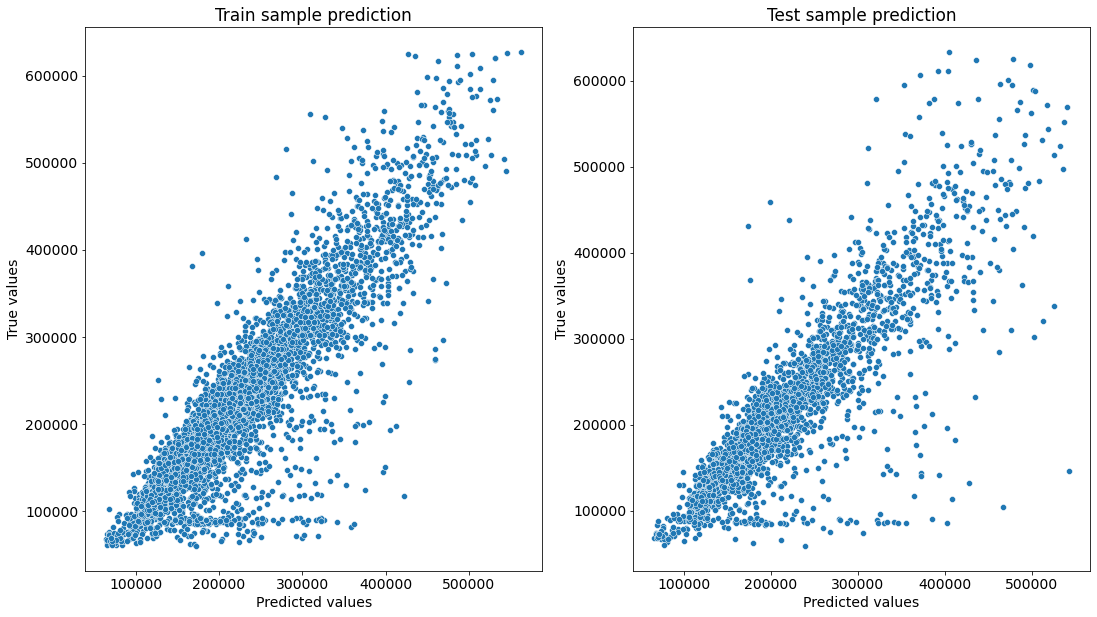

In [76]:
y_train_preds = gb_model.predict(X_train)
y_test_preds = gb_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

#### Кросс-валидация

In [77]:
cv_score = cross_val_score(gb_model, X_train, y_train, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=21))
cv_score

array([0.73341886, 0.69828606, 0.73325342])

In [78]:
cv_score.mean()

0.7216527802095042

#### Важность признаков

In [79]:
feature_importances = pd.DataFrame(zip(X_train.columns, gb_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
1,Square,0.474651
22,DistrictSize,0.247676
12,Social_3,0.054345
0,Rooms,0.031813
11,Social_2,0.027765
7,Ecology_1,0.024313
10,Social_1,0.020835
6,HouseYear,0.017072
28,MedPriceByFloorYear,0.016949
24,MedEcologyByDistrict,0.014953


### 7. Прогнозирование на тестовом датасете

In [80]:
test_df.shape

(5000, 29)

In [81]:
test_df

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,...,HouseFloor_outlier,LifeSquare_nan,Healthcare_1_nan,DistrictSize,IsDistrictLarge,MedEcologyByDistrict,MedSocialByDistrict,MedHealthcareByDistrict,MedShopsByDistrict,MedPriceByFloorYear
0,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,1,1,...,0,0,0,76.0,0,0.079156,1525.500000,518.5,1.0,189479.726551
1,1.0,42.493907,29.493907,10.0,7,17.0,2017,0.072158,1,1,...,0,0,1,164.0,1,0.072158,210.666667,460.0,0.0,177755.781775
2,2.0,59.463678,47.463678,9.0,19,19.0,1977,0.211401,1,1,...,0,1,1,580.0,1,0.072158,306.333333,460.0,0.0,172123.099004
3,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,1,1,...,0,0,1,372.0,1,0.034656,159.000000,460.0,0.0,179689.517526
4,1.0,53.837056,45.837056,5.0,8,17.0,1977,0.309479,1,1,...,0,1,0,65.0,0,0.075779,482.000000,460.0,2.0,191041.760490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2.0,43.177521,30.339945,5.0,2,5.0,1962,0.069660,1,1,...,1,0,1,56.0,0,0.069660,2051.333333,460.5,2.0,179689.517526
4996,3.0,93.698122,80.698122,10.0,21,27.0,2018,0.060753,1,1,...,0,0,0,26.0,0,0.060753,934.666667,260.0,7.0,204011.701682
4997,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,1,1,...,0,0,0,54.0,0,0.225825,2202.000000,775.5,2.0,179689.517526
4998,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,1,1,...,0,0,1,40.0,0,0.089040,2671.333333,460.0,11.0,191041.760490


In [82]:
SUMPLE = r'\Users\VasiliyBarovLAPTOP\Desktop\NW\sample_submission.csv'
submit = pd.read_csv(SUMPLE)
submit.head()

,Id,Price
0,4567,200000.0
1,5925,200000.0
2,960,200000.0
3,3848,200000.0
4,746,200000.0


In [83]:
predictions = gb_model.predict(test_df)
predictions

array([161428.84049378, 126097.52750999, 153055.19383783, ...,
       144651.26230779, 191816.97339551, 251842.9815928 ])

In [84]:
submit['Price'] = predictions
submit.head()

,Id,Price
0,4567,161428.840494
1,5925,126097.527510
2,960,153055.193838
3,3848,124081.184610
4,746,217587.030627


In [85]:
submit.to_csv('rf_submit.csv', index=False)

In [86]:
!pip freeze >> requirements.txt